In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Frame Information 
df = pd.read_excel("/home/jupyter-user-3/shared_documents/shared_data_read_only/Data/AfriKids/InternalData/Project_Surveys/Final Data Rapid_Assessment Cleaned Data Shared.xlsx")
df.shape

(1233, 167)

[Text(0.5, 0, 'District'),
 Text(0, 0.5, 'Mean Number of People in the House'),
 Text(0.5, 1.0, 'Mean Number of Missed Days per District')]

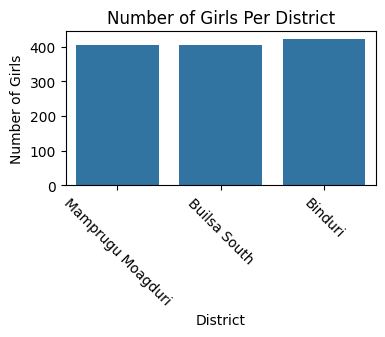

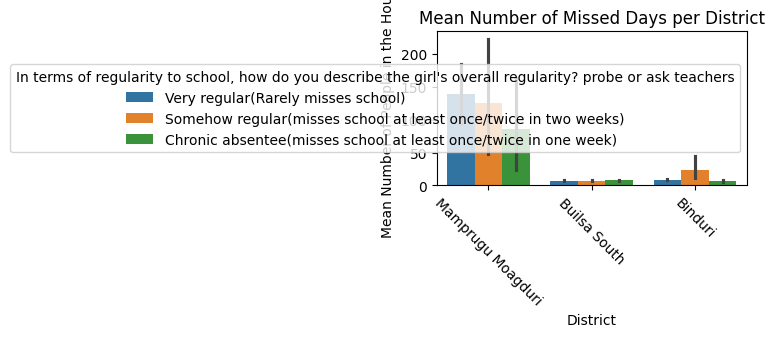

In [43]:
# View Statistics Across Districts 

# Number in Each District 
plt.figure(figsize=(4, 2))
plt.xticks(rotation=-45)
district_dist = sns.countplot(x="District", data=df)
district_dist.set(xlabel="District", ylabel="Number of Girls", title="Number of Girls Per District")

# Get the Mean Attendance Per District 
plt.figure(figsize=(4, 2))
plt.xticks(rotation=-45)
mean_attend = sns.barplot(x="District", y="How many people does girl live with in her household?", hue="In terms of regularity to school, how do you describe the girl's overall regularity? probe or ask teachers", data=df, estimator="mean")
mean_attend.set(xlabel="District", ylabel="Mean Number of People in the House", title = "Mean Number of Missed Days per District")
                     



# Add Factors for Noise - Split up Current Graphs

# Look into why looking at Girls in Ghana in these Regions is Important 

<Figure size 640x480 with 0 Axes>

<Figure size 900x600 with 0 Axes>

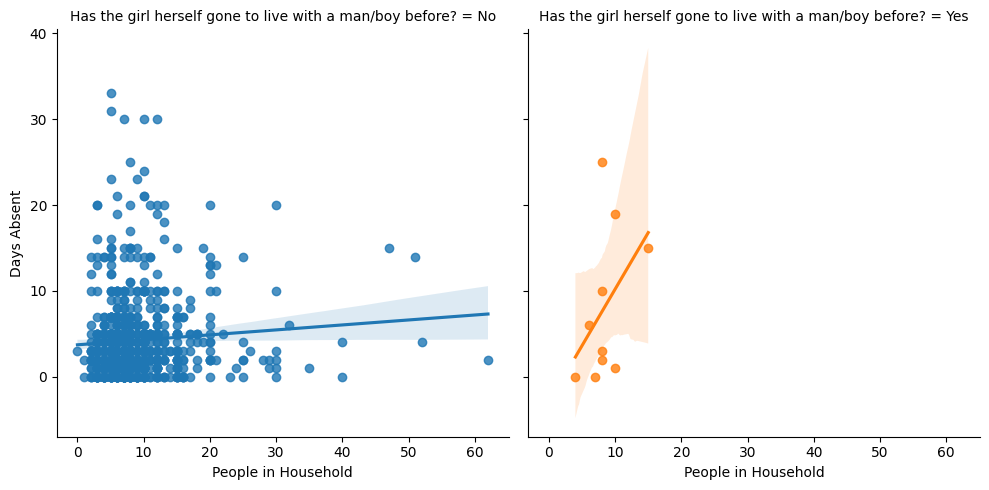

<Figure size 640x480 with 0 Axes>

In [44]:
# Analysis of Number of Family Members with Attendance

# Get Plot Size
plt.figure(figsize=(9, 6))

# Check out How Number of Family Members Correlates with Attendance
df = df[df["How many people does girl live with in her household?"] < 999]

# Scatter Plot One: Number of People in Household, Live with a Man Before, and Days Absent 
scatter_df1 = df[df["Has the girl herself gone to live with a man/boy before?"] != "No response"]
scatter1 = sns.lmplot(x="How many people does girl live with in her household?", y="How many days was girl absent from school for the current academic term? Probe and estimate or ask teachers", col="Has the girl herself gone to live with a man/boy before?", hue="Has the girl herself gone to live with a man/boy before?", data=scatter_df1)
scatter1.set(xlabel="People in Household", ylabel="Days Absent")
plt.figure()

# Confusion Matrix with Two Cat and a Numerical

# How Does Ability to Pay Correlate with Attendance

<Figure size 640x480 with 0 Axes>

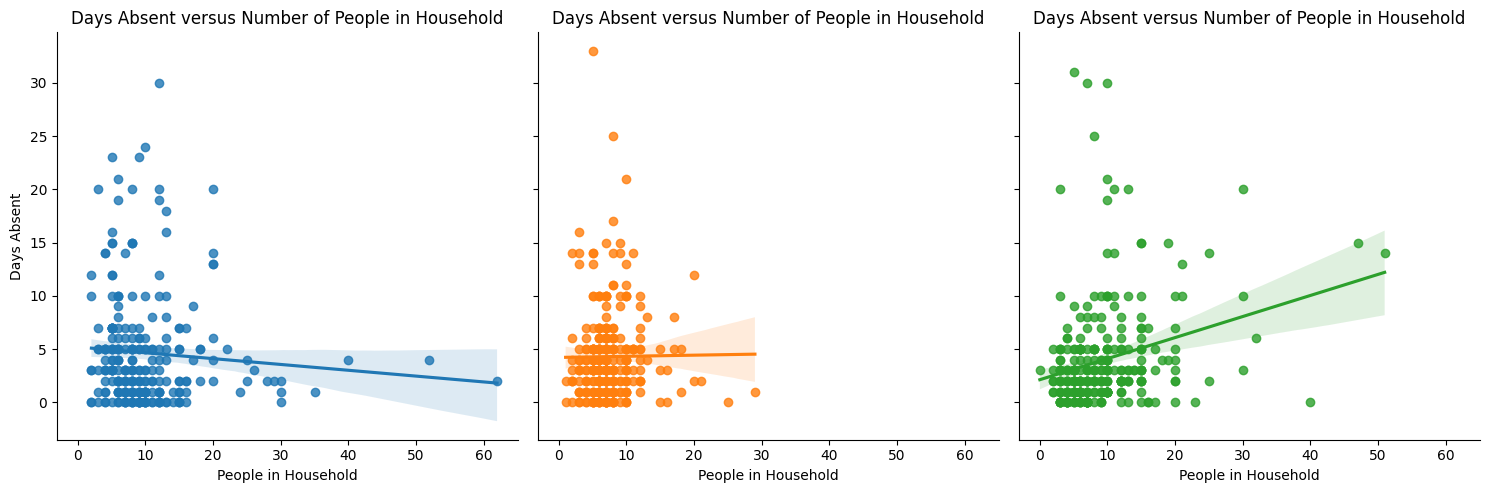

<Figure size 640x480 with 0 Axes>

In [45]:
# Get the Mean Attendance Per District Per Community - Edit 
scatter2 = sns.lmplot(x="How many people does girl live with in her household?", y="How many days was girl absent from school for the current academic term? Probe and estimate or ask teachers", col="District", hue="District", data=scatter_df1)
scatter2.set(xlabel="People in Household", ylabel="Days Absent", title="Days Absent versus Number of People in Household")
plt.figure()

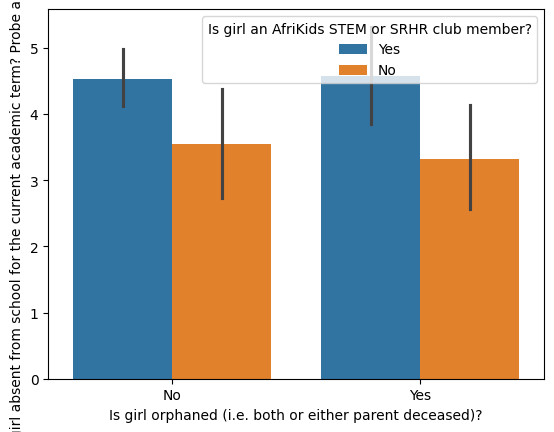

In [49]:
# Orphan Vs. Attendance
barplot1 = sns.barplot(x="Is girl orphaned (i.e. both or either parent deceased)?", y="How many days was girl absent from school for the current academic term? Probe and estimate or ask teachers", hue="Is girl an AfriKids STEM or SRHR club member?", estimator="mean", data=df)

<Figure size 640x480 with 0 Axes>

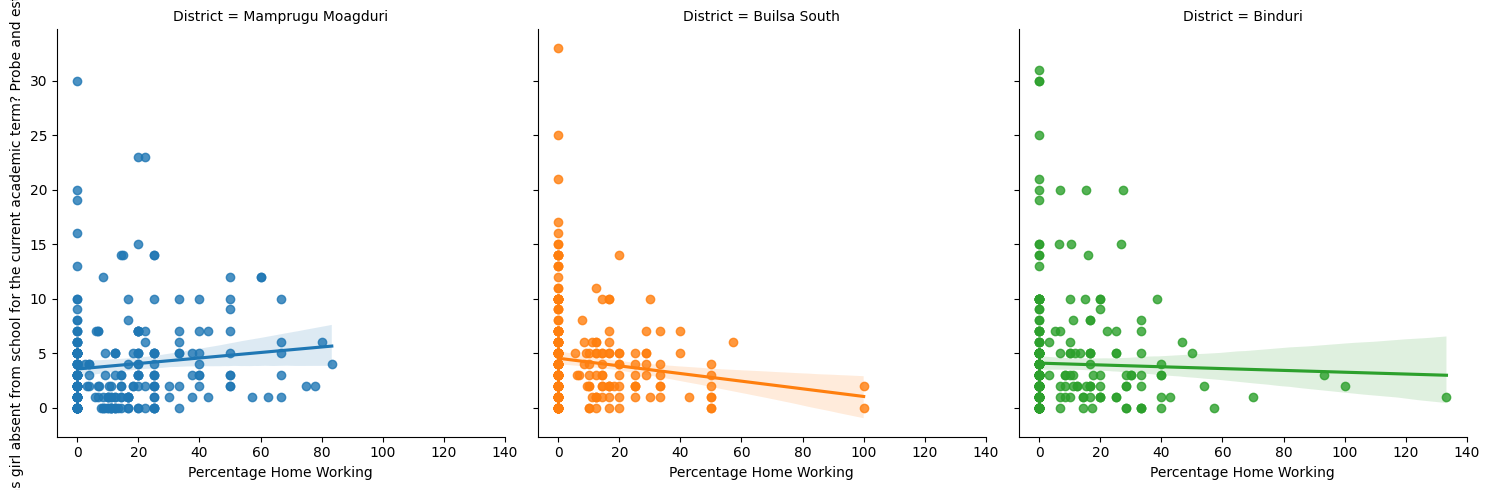

<Figure size 640x480 with 0 Axes>

In [60]:
# Percentage of People at Home Working
df["Percentage Home Working"] = df["How many of the people living in her household are working and earning income?"]/df["How many people does girl live with in her household?"] * 100
scatter3 = sns.lmplot(x="Percentage Home Working", y="How many days was girl absent from school for the current academic term? Probe and estimate or ask teachers", col="District", hue="District", data=df)
plt.figure()

<Figure size 640x480 with 0 Axes>

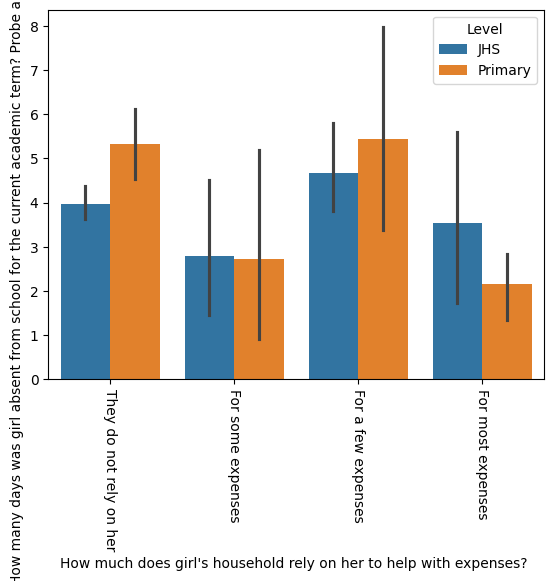

<Figure size 640x480 with 0 Axes>

In [48]:
val = sns.barplot(x="How much does girl's household rely on her to help with expenses? ", y="How many days was girl absent from school for the current academic term? Probe and estimate or ask teachers", estimator="mean", hue="Level", data=df)
plt.xticks(rotation=-90)
plt.figure()

<Axes: xlabel='How many of the siblings are younger than her?', ylabel='How many days was girl absent from school for the current academic term? Probe and estimate or ask teachers'>

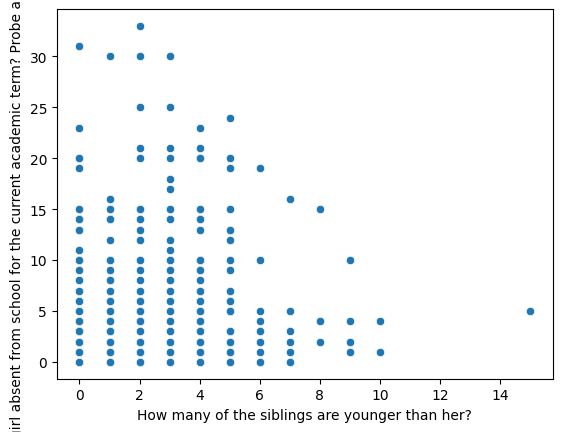

In [51]:
sns.scatterplot(x="How many of the siblings are younger than her?", y="How many days was girl absent from school for the current academic term? Probe and estimate or ask teachers", data=df)

[Text(0.5, 0, 'Regularity of Attendance'),
 Text(0, 0.5, 'Percentage Home Working'),
 Text(0.5, 1.0, 'Percentage of the Home Working for Girls of Different Districts that Attend School at Different Regularities')]

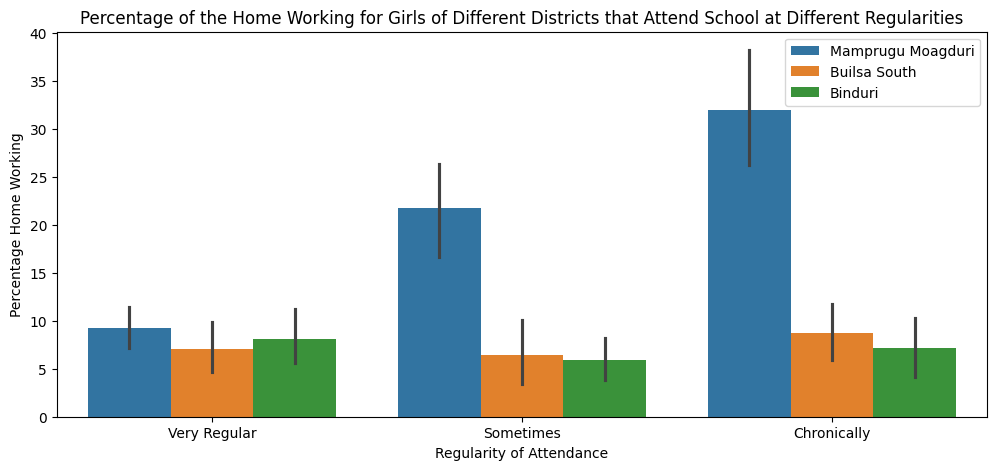

In [98]:
df["In terms of regularity to school, how do you describe the girl's overall regularity? probe or ask teachers"].replace({'Very regular(Rarely misses school)': 'Very Regular', 'Somehow regular(misses school at least once/twice in two weeks)': 'Sometimes', 'Chronic absentee(misses school at least once/twice in one week)':'Rarely'}, inplace=True)

# Switch Focus to Regularity 
plt.figure(figsize=(12, 5))
reg_perc = sns.barplot(x="In terms of regularity to school, how do you describe the girl's overall regularity? probe or ask teachers", y = "Percentage Home Working", estimator="mean", hue="District", data=df)
plt.legend(loc='upper right')
reg_perc.set(xlabel="Regularity of Attendance", ylabel="Percentage Home Working", title="Percentage of the Home Working for Girls of Different Districts that Attend School at Different Regularities")

[Text(0.5, 0, 'Regularity of Attendance'),
 Text(0, 0.5, 'Number of Girls'),
 Text(0.5, 1.0, 'Distribution of Attendance Regularity and Dependence on Girl for Expenses')]

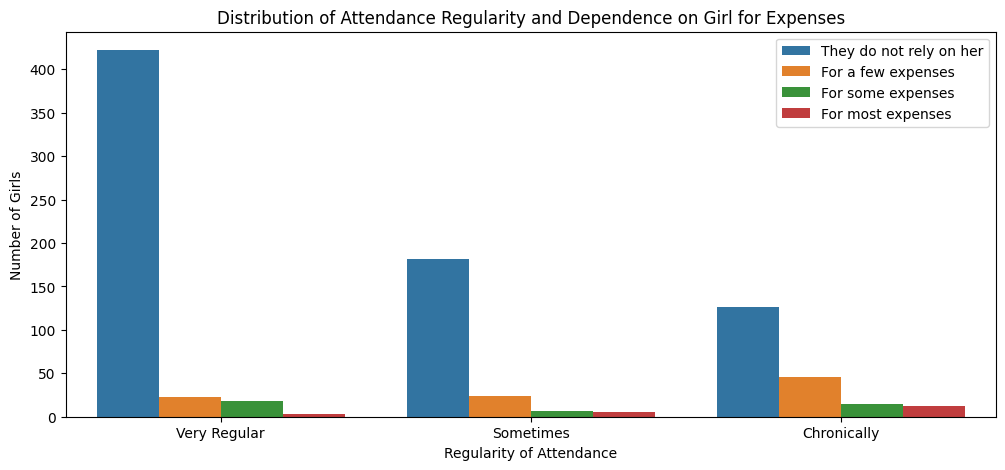

In [83]:
# How Often Girls Attend School Verse Dependency for Expenses 
plt.figure(figsize=(12, 5))
reg_expenses = sns.countplot(x="In terms of regularity to school, how do you describe the girl's overall regularity? probe or ask teachers", hue="How much does girl's household rely on her to help with expenses? ", data=df, hue_order=["They do not rely on her", "For a few expenses", "For some expenses", "For most expenses"])
plt.legend(loc='upper right')
reg_expenses.set(xlabel="Regularity of Attendance", ylabel="Number of Girls", title="Distribution of Attendance Regularity and Dependence on Girl for Expenses")

[Text(0.5, 0, 'Community Name'),
 Text(0, 0.5, 'Number of Girls'),
 Text(0.5, 1.0, 'Distribution of Attendance Regularity and Dependence on Girl for Expenses')]

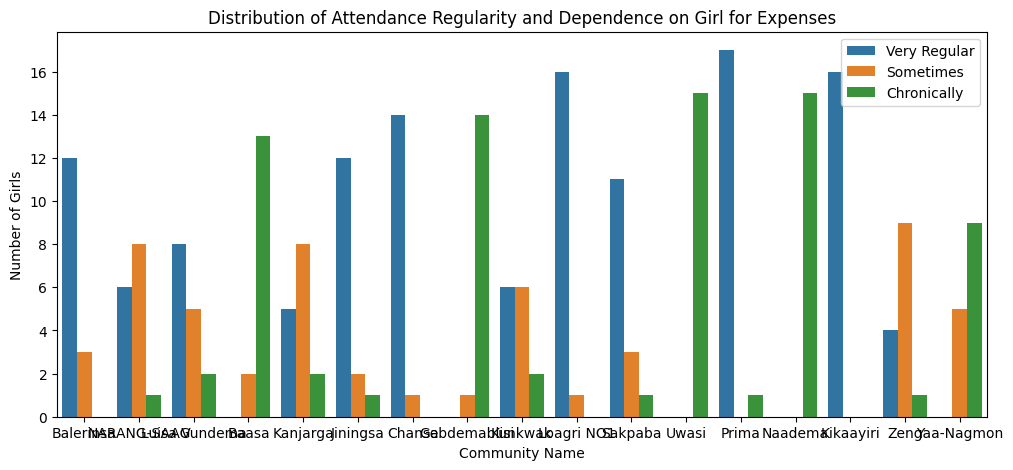

In [95]:
temp_df = df.groupby("Community name").filter(lambda x: len(x) > 210)

plt.figure(figsize=(12, 5))
reg_expenses = sns.countplot(x="Community name", hue="In terms of regularity to school, how do you describe the girl's overall regularity? probe or ask teachers", data=temp_df)
plt.legend(loc='upper right')
reg_expenses.set(xlabel="Community Name", ylabel="Number of Girls", title="Distribution of Attendance Regularity and Dependence on Girl for Expenses")

In [99]:
df["Pregnant or Child"] = np.where(df["Is girl currently pregnant?"] == "Yes" or df["Is girl currently pregnant?"] == "Yes", ]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().